# GUC Clustering Project 

**Wesam Ayman Ahmed 46-5313**

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [75]:
# if plotnine is not installed in Jupter then use the following command to install it 

Running this project require the following imports 

In [76]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [77]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



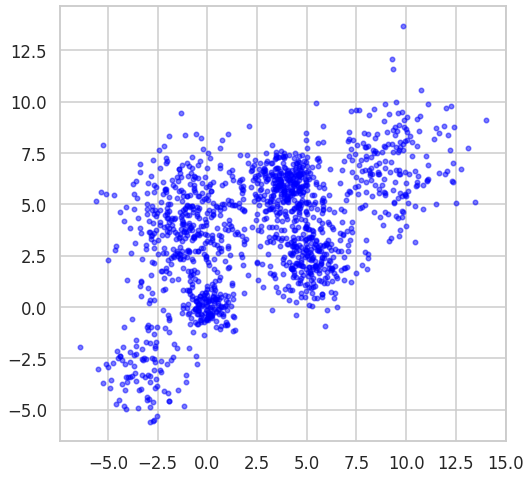

In [78]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

K = 2, silhouette_score = 0.4751544541991239


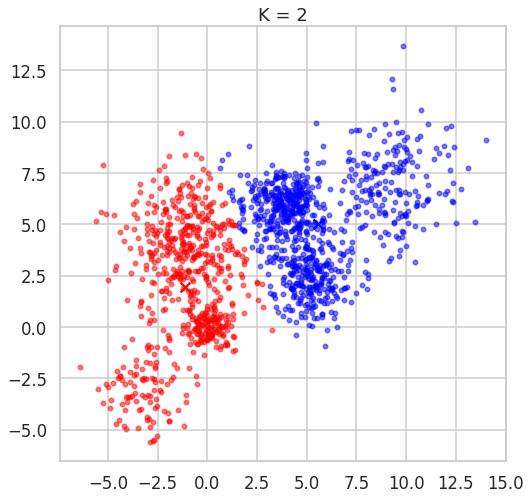

K = 3, silhouette_score = 0.43631793714185435


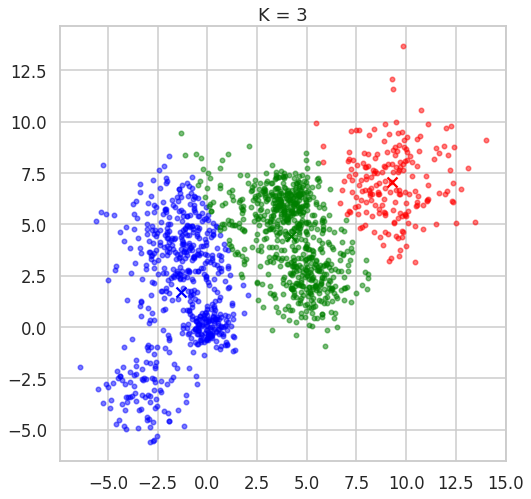

K = 4, silhouette_score = 0.4628725400351352


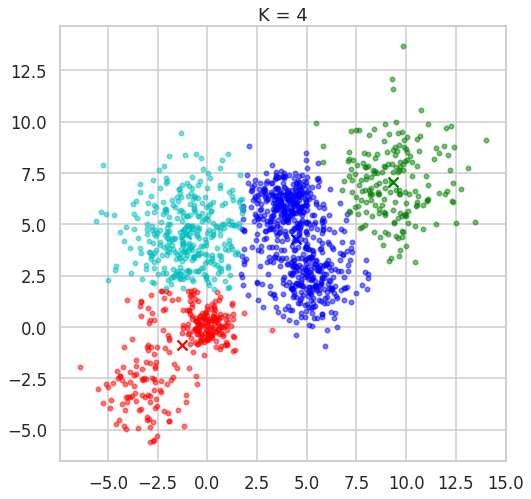

K = 5, silhouette_score = 0.48100602217073096


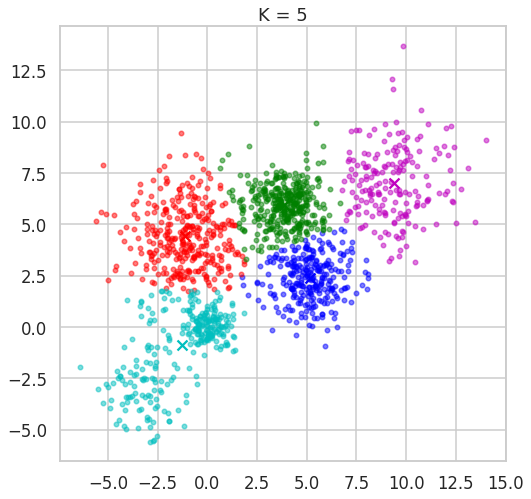

K = 6, silhouette_score = 0.4859737366910219


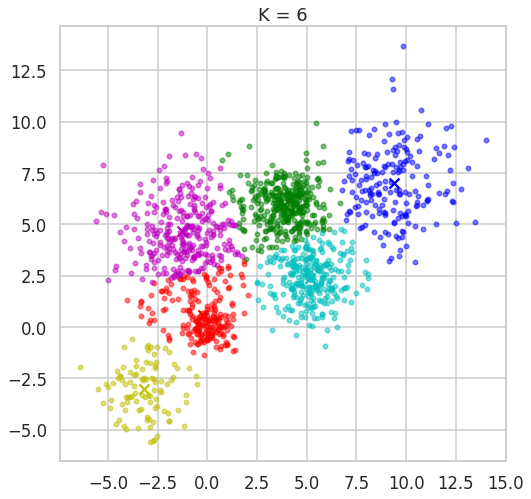

In [79]:
distortions = []
silhouette_scores = []
K = range(2, 7)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Multi_blob_Data)
    distortions.append(kmeans.inertia_)
    score = silhouette_score(Multi_blob_Data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K = {k}, silhouette_score = {score}")
    display_cluster(Multi_blob_Data, kmeans, k)
    plt.title("K = {}".format(k))
    plt.show()


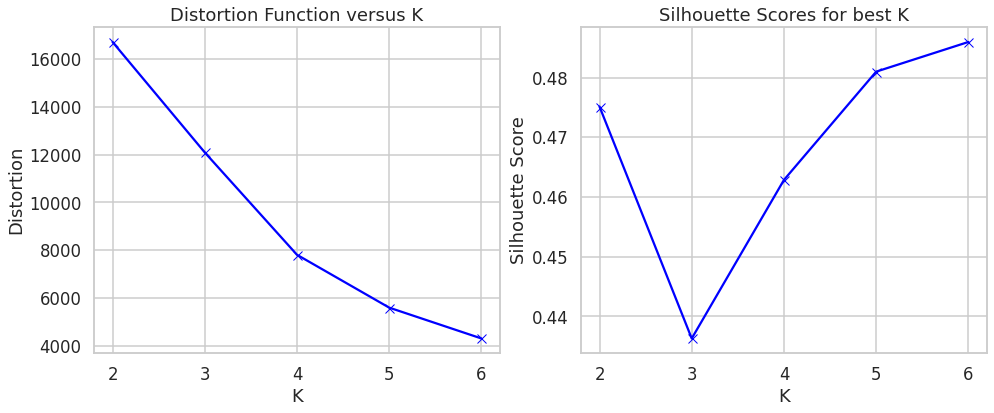

In [80]:
fig, f = plt.subplots(1,2, figsize=(16,6))
f[0].plot(K, distortions, 'bx-')
f[0].set_xlabel('K')
f[0].set_ylabel('Distortion')
f[0].set_title('Distortion Function versus K')

f[1].plot(K, silhouette_scores, 'bx-')
f[1].set_xlabel('K')
f[1].set_ylabel('Silhouette Score')
f[1].set_title('Silhouette Scores for best K')

plt.show()

*   From the distortion function versus K graph, we can see that the distortion decreases as K increases, but the rate of decrease slows down at K=4. So we can conclude that K=4 is the optimal value of K.
*   From the silhouette plot, we can see that the silhouette score is getting high at K=4. This confirms our conclusion that K=4 is the optimal value of K.

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

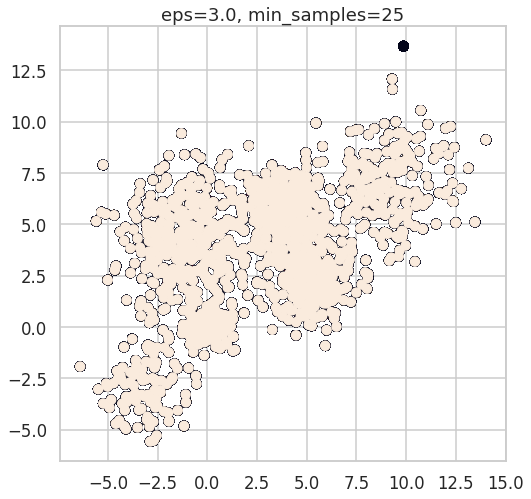

Best Silhouette Score: 0.4685207355522043
Best Parameters (eps, min_samples): (2.0999999999999996, 6)


In [81]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.1, 3, num=30)
min_samples_values = np.arange(5, 26)

best_score = -1
best_params = None
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(Multi_blob_Data)
        if len(np.unique(dbscan_labels)) > 1:
            score = silhouette_score(Multi_blob_Data, dbscan_labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
        plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=dbscan_labels)
        plt.title(f"eps={eps}, min_samples={min_samples}")
plt.show()

print("Best Silhouette Score:", best_score)
print("Best Parameters (eps, min_samples):", best_params)

*  The set of paramters that result in the best silhouette_score (eps,min_samples) = (2.0999999999999996, 6)
*   Best silhouette_score = 0.4685207355522043

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

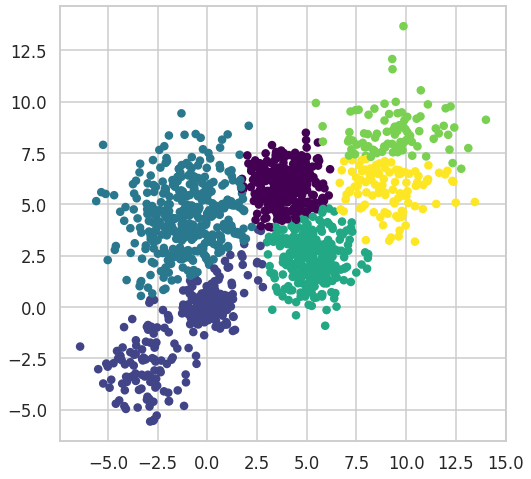

In [82]:
# fit a Gaussian Mixture Model with six components
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm.fit(Multi_blob_Data)

# predict the cluster labels
gmm_labels = gmm.predict(Multi_blob_Data)

# plot the resulting clusters
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=gmm_labels, s=50, cmap='viridis')
plt.show()


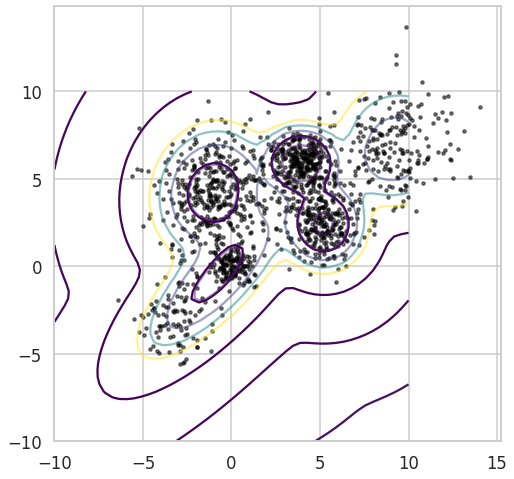

In [83]:
# plot the data points
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=10, color='black', alpha=0.5)

# plot the GMM components
x = np.linspace(-10., 10.)
y = np.linspace(-10., 10.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10), cmap='viridis')

# plot the total GMM
plt.contour(X, Y, np.exp(Z), levels=np.logspace(0, 3, 10), alpha=0.5, cmap='viridis')
plt.show()


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [84]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 